## TimeCourse

 

### Imports and Getting the Test Model

In [19]:
%matplotlib inline
from pycotools import model, tasks, viz, misc, models
import os
import pandas
from lxml import etree

### Get Model Object 

In [7]:
## get string model from `models`
zi_model_string = models.ZiModels().published_zi

## get a working directory. Change this to change this to wherever you like
directory = r'/home/b3053674/Documents/Models/2017/10_Oct/TutorialWorkspace'

## choose path to zi model
zi_path = os.path.join(directory, 'zi2012.cps')

##write model to file
with open(zi_path, 'w') as f:
    f.write(zi_model_string)
    
## check file exists
if not os.path.isfile(zi_path):
    raise Exception
    
zi = model.Model(zi_path)

### Deterministic Time Course
#### Run a deterministic time course

In [ ]:
TC = tasks.TimeCourse(
    zi, report_name='zi_timecourse_report.txt',
    end=1000, intervals=50, step_size=20
)

## check its worked
os.path.isfile(TC.report_name)


df = pandas.read_csv(TC.report_name, sep='\t')
df.head()

##### Save time course configured model

In [ ]:
zi = TC.model
zi.save()

The following equation must hold true: $intervals \cdot step\_size = end$. Alternatively, the model can be saved by setting the `save` keyword to True. 

#### Being selective about which output variables to select
Use the `metabolites`, `global_quantities` and `local_parameters` arguments

In [ ]:
TC=tasks.TimeCourse(
    zi,
    report_name='zi_timecourse_report.txt',
    end=1000,
    intervals=50,
    step_size=20,
    metabolites=['Smad3c','Smad3n', 'Smad4n', 'Smad4c'],
    global_quantities = [],
    save=True
)

##check that we only have two variables
pandas.read_csv(TC.report_name,sep='\t').head()

Note that this model is specifically a deterministic model and will not simulate with the stochastic or hybrid solvers. 

### Visualization

#### Plot the results
By default all species are plotted separetly

In [ ]:
viz.PlotTimeCourse(TC)

#### Plot on the same axis
We can plot on the same axis

In [ ]:
viz.PlotTimeCourse(TC, separate=False)

#### Choose Y variables

In [ ]:
viz.PlotTimeCourse(TC, y=['Smad3c', 'Smad3n'], separate=False)
viz.PlotTimeCourse(TC, y=['Smad4c', 'Smad4n'], separate=False)

#### Plot in Phase Space
Choose the x variable to plot phase space. Same arguments apply as above. 

In [ ]:
viz.PlotTimeCourse(TC, x='Smad3c', separate=True)

#### Save to file

In [ ]:
viz.PlotTimeCourse(TC, y=['Smad3c', 'Smad3n'], separate=False, savefig=True, filename='MyTimeCourse.eps')

### Alternative Solvers
Valid arguments for the `method` argument of `TimeCourse` are:
-  deterministic
-  direct
-  gibson_bruck
-  tau_leap
-  adaptive_tau_leap
-  hybrid_runge_kutta
-  hybrid_lsoda

Copasi also includes a `hybrid_rk45` solver but this is not yet supported by Pycotools. To use an alternative solver, pass the name of the solver to the `method` argument. 

#### Stochastic MM
For demonstrating simulation of stochastic time courses we load another model from the `models` storage module: The stochastic michaelis menten schema. 

In [11]:
## create filename for stochastic model
stochastic_mm = os.path.join(directory, 'stochasticMM.cps')

## if already exists, remove so that we can write it again
if os.path.isfile(stochastic_mm):
    os.remove(stochastic_mm)

## Get stochastic mm model from storage class under `models`
MM = models.MichaelisMenten()
MM.to_file(MM.stochastic, stochastic_mm)

if not os.path.isfile(stochastic_mm):
    raise Exception('File was not written!')
    
mm = model.Model(stochastic_mm)
mm

Model(name=New Model, time_unit=s, volume_unit=ml, quantity_unit=mmol)

### Run a Time Course Using Direct Method

In [20]:
TC = tasks.TimeCourse(mm, end=1000, intervals=1000, step_size=1, method='direct')

### Plot stochastic time course

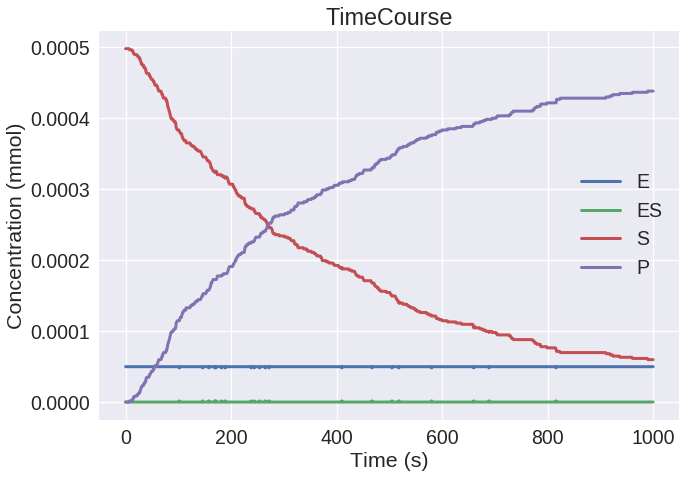

In [18]:
viz.PlotTimeCourse(TC, separate=False)